# Deep Learning Project 3 

Due Wednesday 11/4

## Convolutional Neural Networks and Image Classification

In this project, you will apply convolutional neural networks and ideas learned in Chapters 4 and 5 of our textbook to classify images in a dataset of your choice. 

### The dataset

There are three other image datasets packaged with Keras that we have not yet explored: 
* CIFAR-10: is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
* CIFAR-100: is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes. 
* Fashion MNIST dataset: is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

Instructions for loading these datasets from Keras are found [here](https://keras.io/api/datasets/). **CIFAR-10 and Fashion MNIST are pretty simple to solve with CNNs. So please use these datasets for your own experimentation.**

For Project 3, you can choose CIFAR-100 or another datasets of your own choice. Just be mindful of the size (number of samples) and type of problem (binary or multiclass classification) you are trying to tackle, relative to the computing power at your disposal (your laptop, desktop, etc). [Kaggle](kaggle.com) is a good place to look around. One clean Kaggle project I know of is the [Humpback whale dataset](https://www.kaggle.com/c/humpback-whale-identification/data?select=train). There are roughly 25.4K files in the training set and 7.9K files in the test set. This dataset  has received a lot of attention over the last two years. 

### The Approach
Section 4.5 of the textbook outlines a clear workflow for solving a machine-learning problem. As a reminder, the steps included the following:
1. Defining the problem and assembling a dataset
2. Choosing a measure of success
3. Deciding on an evaluation protocol
4. Preparing the data
5. Developing a model that does better than a baseline
6. Scaling up: developing a model that overfits
7. Regularizing the model and tuning hyper parameters

For this project, you are required to follow the above workflow, documenting your work along the way in your report. For example, for the Humpback whale dataset, I would spend some time looking at the dataset to determine the number of classes, the number of samples per class, the number of pixels per image, etc. One key thing would be to decide the size of the images for my network given my computing power (i.e. I know that about 30 epochs on 150x150 dog-vs-cat images take several hours to process, where as it takes less time for MNIST 28x28 images.

### Requirements
Here are requirements for your work:
* You must design and attempt to train a convolutional network from scratch, following the workflow of section 4.5. 
* You must implement transfer learning (section 5.3) either through feature extraction or fine tuning. Choose one of the models prepackaged with Keras (Xception, VGG16, etc). 
* You must use of the three visualization techniques of section 5.4 to attempt to interpret your results.

#Using CIFAR-100 Dataset:

###Defining the problem and assembling a dataset

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). The problem is that we want to identify and classify images into 100 classes that are subclasses of these coarse identifications: 

1.   aquatic mammals
2.   fish 
3.  flowers	
4.  food containers
5.  fruit and vegetables
6.  household electrical devices
7.  household furniture	
8.  insects
9.  large carnivores	
10. large man-made outdoor things	
11. large natural outdoor scenes	 
12. large omnivores and herbivores	
13. medium-sized mammals	fox, porcupine, possum, raccoon, skunk 
14.  non-insect invertebrates	
15.  people	
16.  reptiles
17.  small mammals	
18.  trees	
19.  vehicles 1	
20.  vehicles 2

#Choosing a measure of success

Because there are an equal number of eah type of class, this is a class-balanced problem and accuracy (or ROCAUC) would suffice. For this problem, we will stick with accuracy. 
#Deciding on an evaluation protocol

We have plenty of data. 50,000 training samples can be reduced to 40,000 training samples and 10,000 validation samples. It will be best to use this hold-out validation set due to the fact that we have plenty of samples. In addition, the samples are spread out pretty evenly through the training and validation dataset. In the validation set, no class is seen less than 77 times and no more than 117 times. This split is perfectly acceptable for validation data.


#Preparing the data is in the cell below:


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


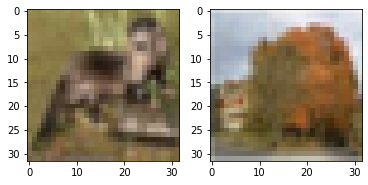

In [ ]:
import keras
from keras import layers, models,optimizers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from skimage import filters
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#convert to grayscale and scale the intensities
#x_train = np.mean(x_train, axis=3)
#x_test = np.mean(x_test, axis=3)
fig, (ax1, ax2) = plt.subplots(1,2)
x_train = x_train/ 255.0
x_test = x_test / 255.0
ax1.imshow(x_train[100])
ax2.imshow(x_test[102])
plt.show()

x_val = x_train[40000:]
y_val = y_train[40000:]
x_train = x_train[:40000]
y_train = y_train[:40000]


'''
#this shows the balance within validation set
print("Unique occurences of validation set")
for i in range(100):
  print("Occurences of class " +str(i)+": "+str(np.count_nonzero(y_val == i)))
'''


y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

np.save("cifar100_y_test", y_test)
np.save("cifar100_x_test", x_test)


#BUILDING THE NAIVE MODEL

Baseline accuracy is 1% since there are 100 classes

In [ ]:

#BUILDING THE MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
history = model.fit(x_train,y_train,batch_size=100, epochs = 30, verbose = 2, validation_data=(x_val,y_val))

model.save('cifar100_basic_cnn.keras')


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               1843456   
_________________________________________________________________
dense_13 (Dense)             (None, 100)               25700     
Total params: 1,870,052
Trainable params: 1,870,052
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
400/400 - 31s - loss: 3.8791 - acc: 0.1197 - val_loss: 3.4887 - val_acc: 0.1905
Epoch 2/30
400/400 

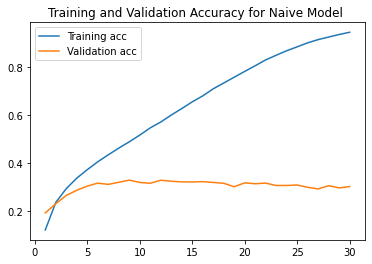

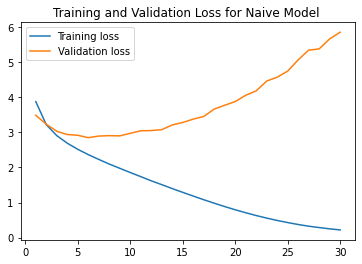

In [ ]:

#PLOTTING STATS
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,label = 'Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and Validation Accuracy for Naive Model ')
plt.legend()
plt.figure
plt.show()

plt.plot(epochs,loss,label = 'Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation Loss for Naive Model ')
plt.legend()
plt.show()


#BUILDING (ANOTHER) MODEL THAT OVERFITS HAHA



In [ ]:

#BUILDING THE MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
history = model.fit(x_train,y_train,batch_size=100, epochs = 100, verbose = 2, validation_data=(x_val,y_val))

model.save('cifar100_overfit_cnn.keras')


In [ ]:

#PLOTTING STATS
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,label = 'Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and Validation Accuracy for Overfitting Model')
plt.legend()
plt.figure
plt.show()

plt.plot(epochs,loss,label = 'Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation Loss for Overfitting Model')
plt.legend()
plt.show()


#Trying to overcome overfitting, tuning hyperparameters etc

Added dropout layer. Data augmentation, too. I had to run this through Google Colab because the GPU was not working for some reason. It took forever and then would quit giving me an error that said "queue is empty". Not sure what it means but I think it might have to deal with theaugmented data part. I had no issues with any other model being trained on the GPU. 

I tried a bunch of different hyperparameters. I stopped training at 35 epochs because the validation accuracy stopped improving around then when I trained for 100. Also, I looked into different activation functions. I found an article that mentioned a modified elliot activation that actually was the best performer on the cifar100 dataset. Interesting, but I could not find a pre-built activation that was similar to modified elliot. I stuck with relu for most of the convolutional layers.

I even experimented with a second dropout layer, and tried to get rid of the Dense 512 layer. This was still the best-performer.

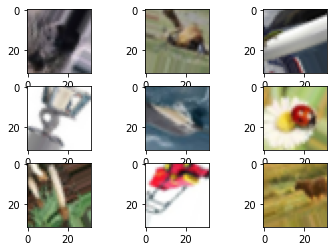

In [ ]:
'''
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
  
datagen = ImageDataGenerator(rotation_range=40,vertical_flip=True,width_shift_range=.2, height_shift_range=.2, fill_mode='nearest')

# fit parameters from data
datagen.fit(x_train)

# Configure batch size and retrieve one batch of images
j=0
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=10):
    # Show 9 images
    if j==0:
      for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    j+=1
    # show the plot
    plt.show()
    if j == 100:
      break
'''

In [ ]:
'''
#BUILDING THE MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
datagen.fit(x_train)

#################might have to change this line of code
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                        steps_per_epoch=x_train.shape[0] // 100,
                        epochs=100,
                        validation_data=(x_val, y_val))

model.save('cifar100_third_cnn.keras')
'''

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2048)             

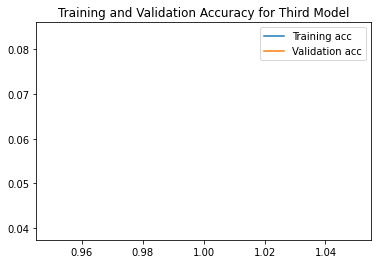

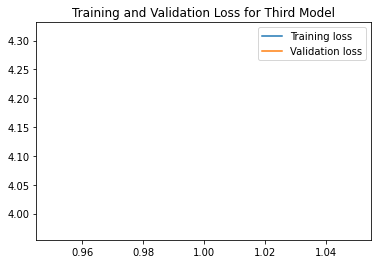

In [ ]:
'''
#PLOTTING STATS
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,label = 'Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and Validation Accuracy for Third Model')
plt.legend()
plt.figure
plt.show()

plt.plot(epochs,loss,label = 'Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation Loss for Third Model')
plt.legend()
plt.show()
'''

#TRANSFER LEARNING USING FEATURE EXTRACTION

This will use the GPU available, and VGG16 model

In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
conv_base.trainable = False

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])
history = model.fit(x_train,y_train,batch_size=100, epochs = 100, verbose = 2, validation_data=(x_val,y_val))

model.save('cifar100_vgg16_cnn.keras')

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_38 (Dense)             (None, 100)               25700     
Total params: 15,134,372
Trainable params: 419,684
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/500
400/400 [==============================] - 367s 917ms/step - loss: 3.6725 - acc: 0.1431 -

KeyboardInterrupt: ignored

In [ ]:
#PLOTTING STATS
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,label = 'Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.title('Training and Validation Accuracy for VGG16')
plt.legend()
plt.figure
plt.show()

plt.plot(epochs,loss,label = 'Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation Loss for VGG16')
plt.legend()
plt.show()

### Timeline/What to turn in for Project 3

Suggested timeline:
* Wednesday 10/28: Chose a dataset and have a model that beats a baseline.
* Friday 10/30: Have successfully attempted transfer learning. 
* Monday 11/2: Have completed work to solve overfitting.
* Wednesday 11/4: Have completed visualization and interpretation.

**Your report for Project 3 (a Jupyter notebook with your code, comments in markup cells, and output cells) is due Wednesday 11/4 by midnight.**  

### Learning outcomes
After completing project 3, you will be able to:
* Implement convolutional neural networks for image classification problems
* Organize datasets and apply a workflow to solve a machine learning problem
* Make decisions regarding input data, model architecture, etc. that affect the solution of classification problems